In [48]:
import sympy as sym
import numpy as np
import matplotlib.pyplot as plt
from scipy.linalg import circulant
from scipy.integrate import solve_ivp

### Question 1

From equation (4) we have know pressure is related to other quantities by the equation of state:

$ p = (\gamma - 1)(\rho E - \frac{1}{2}\rho u^2) \tag{4}$

The conserved variables $\rho$, $\rho u$, and $\rho E$ are assigned to the vector:

$$ q =
\begin{bmatrix}
q_0 \\
q_1 \\
q_2 \\
\end{bmatrix}
=
\begin{bmatrix}
\rho \\
\rho u \\
\rho E \\
\end{bmatrix}
\tag{5}
$$

and we know that $u = \frac{q_1}{q_0} \tag{6}$

The equation of state (4) can then be rewritten as:

$$ p = (\gamma - 1)(q_2 - \frac{1}{2} q_0 (\frac{q_1}{q_0})^2) \\$$
$$ p = (\gamma - 1)(q_2 - \frac{1}{2} \frac{q_1^2}{q_0}) \tag{23}$$

### Question 2

The Euler equations in their conservative form are:

$$
\frac{\partial \rho}{\partial t} + \frac{\partial \rho u}{\partial x}  = 0 \tag{1}
$$
$$
\frac{\partial \rho u}{\partial t} + \frac{\partial}{\partial x} (\rho u^2 + p) = 0 \tag{2}
$$
$$
\frac{\partial \rho E}{\partial t} + \frac{\partial}{\partial x} [(\rho E + p) u] = 0 \tag{3}
$$

We want to represent the Euler equations as vector form:
$$
\frac{\partial q}{\partial t} + \frac{\partial f(q)}{\partial x} = 0 \tag{7}
$$

For $f_0(q)$, we have:

$f_0(q) = \rho u = q_1$

For $f_1(q)$, we have:

$f_1(q) = \rho u^2 + p = q_0 (\frac{q_1}{q_0})^2 + p$

We can then use equation (23) which we found in Problem 1 to write:

$f_1(q) =\frac{q_1^2}{q_0} + (\gamma - 1)(q_2 - \frac{1}{2} \frac{q_1^2}{q_0})$

For $f_2(q)$, we have:

$f_2(q) = (\rho E + p)u = (q_2 + p)\frac{q_1}{q_0}$

We can then use equation (23) which we found in Problem 1 to write:

$f_2(q) = (q_2 + (\gamma - 1)(q_2 - \frac{1}{2} \frac{q_1^2}{q_0}))\frac{q_1}{q_0}$

We can organize it into the flux vector form and represent it as:
$$ f(q) =
\begin{bmatrix}
f_0(q) \\
f_1(q) \\
f_2(q) \\
\end{bmatrix} =
\begin{bmatrix}
q_1 \\
\frac{q_1^2}{q_0} + (\gamma - 1)(q_2 - \frac{1}{2} \frac{q_1^2}{q_0}) \\
(q_2 + (\gamma - 1)(q_2 - \frac{1}{2} \frac{q_1^2}{q_0}))\frac{q_1}{q_0} \\
\end{bmatrix}
$$



!

In [49]:
q0, q1, q2, gamma = sym.symbols('q0, q1, q2, gamma', real = True)
fq = sym.Matrix([[q1],
                 [q1**2 / q0 + (gamma - 1) * (q2 - q1**2 / (2*q0)) ],
                 [(q1 / q0) * (q2 + (gamma - 1)* (q2 - q1**2 / (2*q0))) ]])

fq

Matrix([
[                                          q1],
[  (gamma - 1)*(q2 - q1**2/(2*q0)) + q1**2/q0],
[q1*(q2 + (gamma - 1)*(q2 - q1**2/(2*q0)))/q0]])

### Question 3

$$M(q) = \frac{\partial f(q)}{\partial q} = \begin{bmatrix}
\frac{\partial f_0(q)}{\partial q_0} & \frac{\partial f_0(q)}{\partial q_1} & \frac{\partial f_0(q)}{\partial q_2} \\
\frac{\partial f_1(q)}{\partial q_0} & \frac{\partial f_1(q)}{\partial q_1} & \frac{\partial f_1(q)}{\partial q_2} \\
\frac{\partial f_2(q)}{\partial q_0} & \frac{\partial f_2(q)}{\partial q_1} & \frac{\partial f_2(q)}{\partial q_2}
\end{bmatrix} $$

Taking the partial derivative for each $q_i$ for every $f_i$, we get the flux-Jacobian matrix:

$$M(q) =
\begin{bmatrix}
0 & 1 & 0\\
\frac{1}{2}\frac{{q_1}^2}{q_0^2}(\gamma - 1) - \frac{{q_1}^2}{q_0^2} & -\frac{{q_1}}{q_0}(\gamma - 1) + \frac{2q_1}{q_0} & \gamma - 1 \\
-\frac{{q_1}}{q_0^2}(q_2 + (\gamma - 1)(q_2 - \frac{1}{2}\frac{{q_1}^2}{q_0})) + \frac{1}{2}\frac{{q_1}^3}{q_0^3}(\gamma - 1) & \frac{q_2}{q_0} + (\gamma - 1)\left(\frac{q_2}{q_0} - \frac{1}{2}\frac{{q_1}^2}{q_0^2}\right) - \frac{{q_1}^2}{q_0^2}(\gamma - 1) & \gamma\frac{q_1}{q_0}
\end{bmatrix}
$$


$$M(q) =
\begin{bmatrix}
0 & 1 & 0 \\
\frac{q_1^2 (\gamma - 3)}{2 q_0^2} & \frac{q_1 (3 - \gamma)}{q_0} & \gamma - 1 \\
\frac{q_1 (-\gamma q_0 q_2 + \gamma q_1^2 - q_1^2)}{q_0^3} & \frac{2\gamma q_0 q_2 - 3\gamma q_1^2 + 3 q_1^2}{2 q_0^2} & \frac{\gamma q_1}{q_0} \\
\end{bmatrix}
$$

In [50]:
M = fq.jacobian([q0, q1, q2])
M.simplify()
M

Matrix([
[                                            0,                                                   1,           0],
[                  q1**2*(gamma - 3)/(2*q0**2),                                   q1*(3 - gamma)/q0,   gamma - 1],
[q1*(-gamma*q0*q2 + gamma*q1**2 - q1**2)/q0**3, (2*gamma*q0*q2 - 3*gamma*q1**2 + 3*q1**2)/(2*q0**2), gamma*q1/q0]])

### Question 4

In [51]:
eigValsM = M.eigenvals(simplify = True)
trueEigVals = list(eigValsM)
print(trueEigVals)

[q1/q0, (q1 - sqrt(2)*sqrt(gamma*(2*gamma*q0*q2 - gamma*q1**2 - 2*q0*q2 + q1**2))/2)/q0, (q1 + sqrt(2)*sqrt(gamma*(2*gamma*q0*q2 - gamma*q1**2 - 2*q0*q2 + q1**2))/2)/q0]


From the above, we can see that the eigenvalues are $\frac{1.0 q_{1}}{q_{0}}, \quad \frac{1.0 \left(q_{1} - \left(\gamma \left(1.0 \gamma q_{0} q_{2} - 0.5 \gamma q_{1}^{2} - 1.0 q_{0} q_{2} + 0.5 q_{1}^{2}\right)\right)^{0.5}\right)}{q_{0}}, \quad \frac{1.0 \left(q_{1} + \left(\gamma \left(1.0 \gamma q_{0} q_{2} - 0.5 \gamma q_{1}^{2} - 1.0 q_{0} q_{2} + 0.5 q_{1}^{2}\right)\right)^{0.5}\right)}{q_{0}}$

The first eigenvalue is:
$$\frac{1.0 q_{1}}{q_{0}}$$ and can be easily simplified to $$\frac{q_{1}}{q_{0}} = u$$

The second eigenvalue is:
$$\frac{1.0 \left(q_{1} - \left(\gamma \left(1.0 \gamma q_{0} q_{2} - 0.5 \gamma q_{1}^{2} - 1.0 q_{0} q_{2} + 0.5 q_{1}^{2}\right)\right)^{0.5}\right)}{q_{0}}$$

cleaned up looks like:
$$\frac{(q_{1} - \sqrt{(\gamma(\gamma q_{0} q_{2} - 0.5 \gamma q_{1}^{2} - q_{0} q_{2} + 0.5 q_{1}^{2})})}{q_{0}}$$

The speed of sound $c$ is given by $c = \sqrt{\frac{\gamma p}{\rho}}$, which can be represented with $q_i$ as $c = \sqrt{\frac{\gamma (\gamma - 1)(q_2 - \frac{1}{2} \frac{q_1^2}{q_0})} {q_0}}$

substituting the speed of sound the the values in the second eigenvalue, we get a second eigenvalue of: $$\frac{q_1 - cq_0}{q_0} = u - c$$

The third eigenvalue is:
$$ \frac{(q_{1} + \sqrt{(\gamma(\gamma q_{0} q_{2} - 0.5 \gamma q_{1}^{2} -q_{0} q_{2} + 0.5 q_{1}^{2}))})}{q_{0}} $$

and the same substitution for the speed of sound can be made to get a final eigenvalue of: $$u + c$$

$$ \Omega =
\begin{bmatrix}
\Omega_0 \\
\Omega_1 \\
\Omega_2 \\
\end{bmatrix} =
\begin{bmatrix}
u - c \\
u \\
u + c \\
\end{bmatrix}
$$

In [52]:
OMEGA = sym.Matrix([[trueEigVals[1], 0, 0],
                    [0, trueEigVals[0], 0],
                    [0, 0, trueEigVals[2]]])

The eigenvalues are too complex to simplify, but will still be shown above in the code below!!!



In [53]:
eigVecsM = M.eigenvects(simplify = True)
c0 = eigVecsM[1][2][0]
c1 = eigVecsM[0][2][0]
c2 = eigVecsM[2][2][0]

X = sym.Matrix([[c0[0], c1[0], c2[0]],
                     [c0[1], c1[1], c2[1]],
                     [c0[2], c1[2], c2[2]]])

In [54]:
c0

Matrix([
[                                                                           2*q0**2*(2*gamma*q0*q2 - gamma*q1**2 + 3*q1**2 - q1*(2*q1 - sqrt(2)*sqrt(gamma*(gamma - 1)*(2*q0*q2 - q1**2))))/(4*gamma**2*q0**2*q2**2 - 8*gamma**2*q0*q1**2*q2 + 3*gamma**2*q1**4 + 8*gamma*q0*q1**2*q2 - 4*gamma*q1**4 + q1**4)],
[q0*(2*q1*(-2*gamma**2*q0*q2 + gamma**2*q1**2 + 2*gamma*q0*q2 - gamma*q1**2 + 2*q1**2) - (2*q1 - sqrt(2)*sqrt(gamma*(gamma - 1)*(2*q0*q2 - q1**2)))*(-2*gamma*q0*q2 + gamma*q1**2 + q1**2))/(4*gamma**2*q0**2*q2**2 - 8*gamma**2*q0*q1**2*q2 + 3*gamma**2*q1**4 + 8*gamma*q0*q1**2*q2 - 4*gamma*q1**4 + q1**4)],
[                                                                                                                                                                                                                                                                                                            1]])

In [55]:
c1

Matrix([
[2*q0**2/q1**2],
[      2*q0/q1],
[            1]])

In [56]:
c2

Matrix([
[                                                                           2*q0**2*(2*gamma*q0*q2 - gamma*q1**2 + 3*q1**2 - q1*(2*q1 + sqrt(2)*sqrt(gamma*(gamma - 1)*(2*q0*q2 - q1**2))))/(4*gamma**2*q0**2*q2**2 - 8*gamma**2*q0*q1**2*q2 + 3*gamma**2*q1**4 + 8*gamma*q0*q1**2*q2 - 4*gamma*q1**4 + q1**4)],
[q0*(2*q1*(-2*gamma**2*q0*q2 + gamma**2*q1**2 + 2*gamma*q0*q2 - gamma*q1**2 + 2*q1**2) - (2*q1 + sqrt(2)*sqrt(gamma*(gamma - 1)*(2*q0*q2 - q1**2)))*(-2*gamma*q0*q2 + gamma*q1**2 + q1**2))/(4*gamma**2*q0**2*q2**2 - 8*gamma**2*q0*q1**2*q2 + 3*gamma**2*q1**4 + 8*gamma*q0*q1**2*q2 - 4*gamma*q1**4 + q1**4)],
[                                                                                                                                                                                                                                                                                                            1]])

### Question 5



#### 5.1

To find the coefficients for $[a_{j}^{+}]_{j=-3}^1$ and $[a_{j}^{-}]_{j=-1}^3$, we need to use a taylor table. The taylor table has been copied below and w will us it to solve for the coefficients in python.

In [57]:
am2, am1, a0, a1, a2 = sym.symbols('am2, am1, a0, a1, a2')
dx = sym.symbols('dx')
am3, a3 = sym.symbols('am3, a3')



M = sym.Matrix([[-1, -1, -1, -1, -1, -1, -1],
                [3*dx, 2*dx, dx, 0 , -dx, -2*dx, -3*dx],
                [-9*dx**2 / 2, -2*dx**2, -dx**2 / 2, 0, -dx**2 / 2, -2 * dx**2, -9 * dx**2 / 2],
                [27 * dx**3 / 6, 4 * dx**3 / 3, dx**3 / 6, 0, -dx**3 / 6, -4 * dx**3 / 3, -27*dx**3 / 6],
                [-81*dx**4 / 24, -2 * dx**4 / 3, -dx**4 / 24, 0 , -dx**4 / 24, -2 * dx**4 / 3, -81*dx**4 / 24],
                [81*dx**5 / 40, 4 *dx**5 / 15, dx**5 / 120, 0 , -dx**5 / 120, -4*dx**5 / 15, -81*dx**5 / 40],
                [-81*dx**6 / 80, -4*dx**6/45, -dx**6/720, 0, -dx**6/720, -4*dx**6 / 45, -81 * dx**6 / 80]])

aCoeff = sym.Matrix([am3, am2, am1, a0, a1, a2, a3])

mult = M * aCoeff

ans = sym.Matrix([0, -1, 0, 0, 0, 0, 0])

sol = sym.solve(mult - ans, [am3, am2, am1, a0, a1, a2, a3])

In [58]:
M = sym.Matrix([[-1, -1, -1, -1, -1],
                [3*dx, 2*dx, dx, 0 , -dx],
                [-9*dx**2 / 2, -2*dx**2, -dx**2 / 2, 0, -dx**2 / 2],
                [27 * dx**3 / 6, 4 * dx**3 / 3, dx**3 / 6, 0, -dx**3 / 6],
                [-81*dx**4 / 24, -2 * dx**4 / 3, -dx**4 / 24, 0 , -dx**4 / 24]])


aCoeff = sym.Matrix([am3, am2, am1, a0, a1])
table = M * aCoeff

table

Matrix([
[                                  -a0 - a1 - am1 - am2 - am3],
[                       -a1*dx + am1*dx + 2*am2*dx + 3*am3*dx],
[     -a1*dx**2/2 - am1*dx**2/2 - 2*am2*dx**2 - 9*am3*dx**2/2],
[   -a1*dx**3/6 + am1*dx**3/6 + 4*am2*dx**3/3 + 9*am3*dx**3/2],
[-a1*dx**4/24 - am1*dx**4/24 - 2*am2*dx**4/3 - 27*am3*dx**4/8]])

In [59]:
ans = sym.Matrix([0, -1, 0, 0, 0])

solp = sym.solve(table - ans, [am3, am2, am1, a0, a1])

solp

{am3: -1/(12*dx), am2: 1/(2*dx), am1: -3/(2*dx), a0: 5/(6*dx), a1: 1/(4*dx)}

From the code above, we see that the coefficients for $[a_{j}^{+}]_{j=-3}^1$ are:
$$\begin{bmatrix}
\frac{-1}{12 \Delta x}\\
\frac{1}{2 \Delta x} \\
\frac{-3}{2 \Delta x}\\
\frac{5}{6 \Delta x}\\
\frac{1}{4 \Delta x}
\end{bmatrix}=
\frac{1}{12 \Delta x}
\begin{bmatrix}
-1 \\
6 \\
-18 \\
10 \\
3
\end{bmatrix}
$$

For $[a_{j}^{-}]_{j=-1}^3$, we can do the same process, except from -1 to 3

In [60]:
M = sym.Matrix([[ -1, -1, -1, -1, -1],
                [dx, 0 , -dx, -2*dx, -3*dx],
                [ -dx**2 / 2, 0, -dx**2 / 2, -2 * dx**2, -9 * dx**2 / 2],
                [ dx**3 / 6, 0, -dx**3 / 6, -4 * dx**3 / 3, -27*dx**3 / 6],
                [ -dx**4 / 24, 0 , -dx**4 / 24, -2 * dx**4 / 3, -81*dx**4 / 24]])

aCoeff = sym.Matrix([am1, a0, a1, a2, a3])
table = M * aCoeff

table

Matrix([
[                                  -a0 - a1 - a2 - a3 - am1],
[                       -a1*dx - 2*a2*dx - 3*a3*dx + am1*dx],
[     -a1*dx**2/2 - 2*a2*dx**2 - 9*a3*dx**2/2 - am1*dx**2/2],
[   -a1*dx**3/6 - 4*a2*dx**3/3 - 9*a3*dx**3/2 + am1*dx**3/6],
[-a1*dx**4/24 - 2*a2*dx**4/3 - 27*a3*dx**4/8 - am1*dx**4/24]])

In [61]:
ans = sym.Matrix([0, -1, 0, 0, 0])

solm = sym.solve(table - ans, [am1, a0, a1, a2, a3])

solm

{am1: -1/(4*dx), a0: -5/(6*dx), a1: 3/(2*dx), a2: -1/(2*dx), a3: 1/(12*dx)}

From the code above, we see that the coefficients for $[a_{j}^{-}]_{j=-1}^3$ are:
$$\begin{bmatrix}
\frac{-1}{4 \Delta x}\\
\frac{-5}{6 \Delta x} \\
\frac{3}{2 \Delta x}\\
\frac{-1}{2 \Delta x}\\
\frac{1}{12 \Delta x}
\end{bmatrix}=
\frac{1}{12 \Delta x}
\begin{bmatrix}
-3 \\
-10 \\
18\\
-6 \\
1
\end{bmatrix}
$$

#### 5.2

In [63]:
ep = ((-solp[am3] * (-3)**5) + (-solp[am2] * (-2)**5) +  (-solp[am1] * (-1)**5) + (-solp[a1])) / 120
print(ep)

em = ((-solm[am1] * (-1)**5) + (-solm[a1]) + (-solm[a2] * (2)**5) + (-solm[a3] * (3)**5)) / 120
print(em)

-1/(20*dx)
-1/(20*dx)


From the leading truncation error calulation for both schemes, the same result is created:
The leading truncation error is: $$\frac{-\Delta x^4}{20} \frac{\partial ^5 f}{\partial x^5} \Bigr|_j$$

This tells us that both schemes are fourth-order accurate.

### Question 6

For $[a_{j}^{+}]_{j=-3}^1$, we have the expression:
$$\frac{df}{dx} = \frac{-f_{n-3} + 6f_{n-2} - 18f_{n-1} + 10f_{n} + 3f_{n+1}}{12 \Delta x}$$

subbing $f_n = e^{ikx}$:
$$\frac{df}{dx} = \frac{-e^{ik(x-3\Delta x)} + 6e^{ik(x - 2\Delta x)} - 18e^{ik(x - \Delta x)} + 10e^{ikx} + 3e^{ik(x + \Delta x)}}{12 \Delta x}$$
$$\frac{df}{dx} =e^{ikx}(\frac{-e^{-3ik\Delta x} + 6e^{-2ik\Delta x} - 18e^{-ik\Delta x} + 10 + 3e^{ik\Delta x}}{12 \Delta x})$$
Using the Euler identity: $e^{ix} = \cos(x) + i\sin(x)$:
$$\frac{df}{dx} =e^{ikx} (\frac{-\cos(-3k \Delta x) -i\sin(-3k \Delta x) + 6\cos(-2k \Delta x) + 6i\sin(-2k \Delta x) - 18\cos(-k\Delta x) -18i\sin(-k\Delta x) }{12 \Delta x} $$
$$+ \frac{10 + 3\cos(k\Delta x) + 3i\sin(k\Delta x)}{12 \Delta x})$$
$$\frac{df}{dx} =e^{ikx} (\frac{-\cos(3k\Delta x) + i\sin(3k\Delta x) + 6\cos(2\Delta x) - 6i\sin(2k\Delta x) - 15\cos(k\Delta x) +21i\sin(k\Delta x) + 10}{12 \Delta x} )$$

Therefore the modified wavenumber $\kappa^{*}$ for $[a_{j}^{+}]_{j=-3}^1$ is:
$$\kappa^{*} =(\frac{-\cos(3k\Delta x) + i\sin(3k\Delta x) + 6\cos(2\Delta x) - 6i\sin(2k\Delta x) - 15\cos(k\Delta x) +21i\sin(k\Delta x) + 10}{12 i \Delta x} )$$

In [64]:
kdx = np.linspace(0, np.pi, 50)

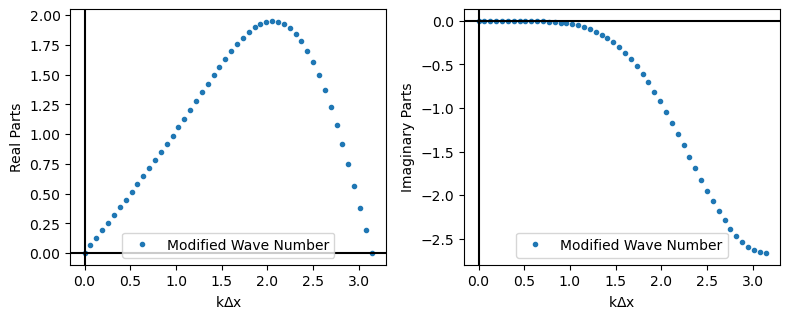

In [65]:
k = (-np.cos(3*kdx) + 1j*np.sin(3*kdx) + 6*np.cos(2*kdx) - 6j*np.sin(2*kdx) - 15*np.cos(kdx) + 21j*np.sin(kdx)
     + 10) / (12j)

fig = plt.figure(figsize=(8, 6), tight_layout=True)
ax1 = fig.add_subplot(221)
ax1.plot(kdx, np.real(k),'.', label = 'Modified Wave Number')

ax1.axhline(y=0, color='k')
ax1.axvline(x=0, color='k')

ax2 = fig.add_subplot(222)
ax2.plot(kdx, np.imag(k),'.',label = 'Modified Wave Number')
ax2.axhline(y=0, color='k')
ax2.axvline(x=0, color='k')

ax1.set_xlabel('k$\Delta$x')
ax1.set_ylabel('Real Parts')
ax2.set_xlabel('k$\Delta$x')
ax2.set_ylabel('Imaginary Parts')
ax1.legend()
ax2.legend()

The real part of the modified wave number has a plot that indicates a curve that peaks, which is not a linear relationship with $k\Delta x$, which is a sign of dispersion.

The imaginary plot of the modified wave number has values that are not zero, indicating the amplitude of waves will decay as they propagate, which indicates that the scheme is dissipative.

For $[a_{j}^{-}]_{j=-1}^3$ we have the expression:
$$\frac{df}{dx} = \frac{-3f_{n-1} - 10f_{n} + 18f_{n+1} - 6f_{n+2} + 1f_{n+3}}{12 \Delta x}$$

subbing $f_n = e^{ikx}$:
$$\frac{df}{dx} = \frac{-3e^{ik(x-\Delta x)} -10e^{ikx} + 18e^{ik(x+\Delta x)} -6e^{ik(x+2\Delta x)} + e^{ik(x+3\Delta x)}}{12 \Delta x}$$
$$\frac{df}{dx} = e^{ikx} (\frac{-3e^{-ik\Delta x} -10 + 18e^{ik\Delta x} -6e^{2ik\Delta x} + e^{3ik\Delta x}}{12\Delta x})$$
Using the Euler identity: $e^{ix} = \cos(x) + i\sin(x)$:
$$\frac{df}{dx} = e^{ikx} (\frac{-3\cos(-k\Delta x) -3i\sin(-k\Delta x) -10 + 18\cos(k\Delta x) + 18i\sin(k\Delta x) -6\cos(2k\Delta x) -6i\sin(2k\Delta x)}{12\Delta x}$$
$$+\frac{ \cos(3k\Delta x) +i\sin(3k\Delta x)}{12\Delta x})$$
$$\frac{df}{dx} = e^{ikx} (\frac{15\cos(k\Delta x) + 21i\sin(k\Delta x) -6\cos(2k\Delta x) -6i\sin(2k\Delta x) + \cos(3k\Delta x) +i\sin(3k\Delta x) -10)}{12\Delta x}$$

Therefore the modified wavenumber $\kappa^{*}$ for $[a_{j}^{-}]_{j=-1}^3$ is:
$$\kappa^{*} = (\frac{15\cos(k\Delta x) + 21i\sin(k\Delta x) -6\cos(2k\Delta x) -6i\sin(2k\Delta x) + \cos(3k\Delta x) +i\sin(3k\Delta x) -10)}{12i\Delta x}$$


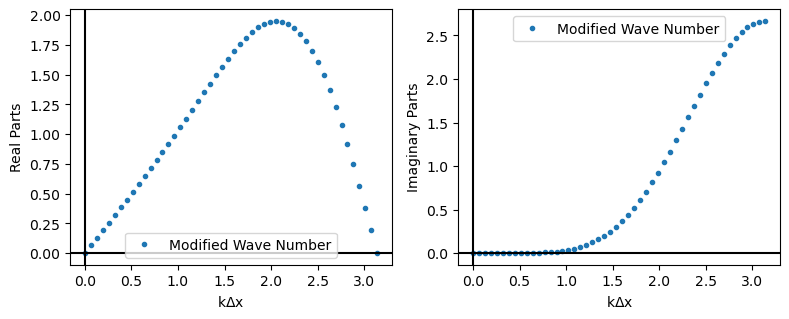

In [66]:
k = (15*np.cos(kdx) + 21j*np.sin(kdx) -6*np.cos(2*kdx) -6j*np.sin(2*kdx) + np.cos(3*kdx)
     + 1j*np.sin(3*kdx) - 10) / (12j)

fig = plt.figure(figsize=(8, 6), tight_layout=True)
ax1 = fig.add_subplot(221)
ax1.plot(kdx, np.real(k),'.', label = 'Modified Wave Number')

ax1.axhline(y=0, color='k')
ax1.axvline(x=0, color='k')

ax2 = fig.add_subplot(222)
ax2.plot(kdx, np.imag(k),'.',label = 'Modified Wave Number')
ax2.axhline(y=0, color='k')
ax2.axvline(x=0, color='k')

ax1.set_xlabel('k$\Delta$x')
ax1.set_ylabel('Real Parts')
ax2.set_xlabel('k$\Delta$x')
ax2.set_ylabel('Imaginary Parts')
ax1.legend()
ax2.legend()

The real part of the modified wave number has a plot that indicates a curve that peaks, which is not a linear relationship with $k\Delta x$, which is a sign of dispersion.

In contrast to the previous scheme, the imaginary parts of the modified wave number is positive and increasing with $k\Delta x$, which does not indicate dissipation.

### Question 7

In [67]:
omegaPlus = OMEGA + abs(OMEGA)
omegaMinus = OMEGA - omegaPlus
valX = sym.lambdify([q0,q1,q2,gamma], X)
valOmegaPlus = sym.lambdify([q0,q1,q2,gamma],omegaPlus)
valOmegaMinus = sym.lambdify([q0,q1,q2,gamma],omegaMinus)

In [69]:
def D_operator_periodic(N,L,R,a):
    first_row = np.zeros(N); first_row[0:L+R+1] = a; first_row = np.roll(first_row,-L)
    return np.array(circulant(first_row)).transpose()

def makeq0(rho, x):
    q0 = np.ones(len(x)) * rho
    return q0

def makeq1(rho, u, x):
    q1 = np.ones(len(x)) * rho * u
    return q1

def makeq2(rho, u, p, gamma):
    q2 = (p / (gamma - 1)) - rho * u**2 / 2
    return q2

def Euler(t, Q, bigMP, bigMM, bigD1, bigD2):
    return (-bigMP @ (bigD1 @ Q) - bigMM @ (bigD2 @ Q))

def OneDEuler(L, T, Nx, Nt):
    x = np.linspace(0, L, Nx, endpoint=False)
    dx = x[1] - x[0]
    ts = np.linspace(0, T, Nt, endpoint=True)
    dt = ts[1] - ts[0]
    gamma = 1.4
    p_inf = 101325
    rho0 = 1.225
    u0 = 100
    p0 = p_inf * (1 + np.exp(-10*(x-L/2)**2) / 10)

    Q0 = makeq0(rho0, x)
    Q1 = makeq1(rho0, u0, x)
    Q2 = makeq2(rho0, u0, p0, gamma)

    zero_mat = np.zeros((Nx,Nx))
    # plus
    D1 = D_operator_periodic(Nx, 3, 1, [-1/(12*dx),1/(2*dx),-3/(2*dx),5/(6*dx),1/(4*dx)]) # size Nx x Nx
    bigD1 = np.block([[D1, zero_mat, zero_mat], [zero_mat, D1, zero_mat], [zero_mat, zero_mat, D1]])

    # minus
    D2 = D_operator_periodic(Nx, 1, 3, [-1/(4*dx),-5/(6*dx),3/(2*dx),-1/(2*dx),1/(12*dx)])
    bigD2 = np.block([[D2, zero_mat, zero_mat], [zero_mat, D2, zero_mat], [zero_mat, zero_mat, D2]])

    U = np.zeros((Nt, 3*Nx))
    U[0] = np.concatenate((Q0, np.concatenate((Q1, Q2))))

    for j in range(1, Nt):
        u = U[j-1]
        bigPl = np.zeros((3*Nx, 3 * Nx))
        bigMi = np.zeros((3*Nx, 3 * Nx))

        for i in range(Nx):
            q0xi = u[i]
            q1xi = u[i + Nx]
            q2xi = u[i + 2*Nx]

            VecX = valX(q0xi, q1xi, q2xi, gamma)
            PO = valOmegaPlus(q0xi, q1xi, q2xi, gamma)
            MO = valOmegaMinus(q0xi, q1xi, q2xi, gamma)

            Mplusi = VecX @ PO @ np.linalg.inv(VecX)
            Mmini = VecX @ MO @ np.linalg.inv(VecX)

            for row in range(3):
                for col in range(3):
                    bigPl[i + row * Nx, i + col * Nx] = Mplusi[row][col]
                    bigMi[i + row * Nx, i + col * Nx] = Mplusi[row][col]

        sol = solve_ivp(Euler, [dt*(j-1), j*dt], U[j-1], args=(bigPl, bigMi, bigD1, bigD2), rtol=1.0e-6, atol=1.0e-6)

        U[j] = sol.y.transpose()[len(sol.y.transpose()) - 1]

    return ts, x, U

### Problem 8

In [70]:
ts, xs, soln = OneDEuler(10, 0.02, 150, 5)
q0s = soln[:,:150]
q1s = soln[:,150:300]
q2s = soln[:,300:]

rhos = q0s
us = q1s / q0s
ps = (1.4-1) * (q2s - .5 * (q1s**2 / q0s))

Text(0, 0.5, 'Solution')

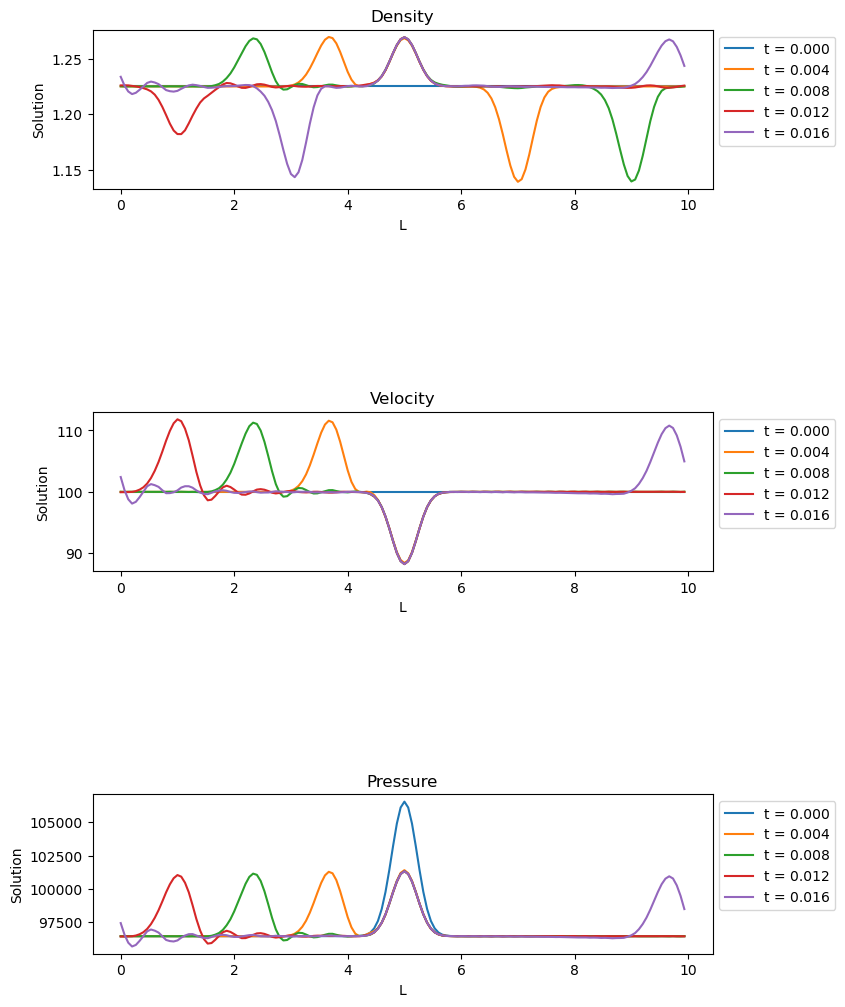

In [71]:
fig = plt.figure(figsize=(8, 12))
ax1 = fig.add_subplot(511)

ax1.plot(xs, rhos[0], label = 't = 0.000')
ax1.plot(xs, rhos[1], label = 't = 0.004')
ax1.plot(xs, rhos[2], label = 't = 0.008')
ax1.plot(xs, rhos[3], label = 't = 0.012')
ax1.plot(xs, rhos[4], label = 't = 0.016')
ax1.legend(bbox_to_anchor=(1.0, 1.0))
ax1.set_title('Density')
ax1.set_xlabel('L')
ax1.set_ylabel('Solution')

ax2 = fig.add_subplot(513)
ax2.plot(xs, us[0], label = 't = 0.000')
ax2.plot(xs, us[1], label = 't = 0.004')
ax2.plot(xs, us[2], label = 't = 0.008')
ax2.plot(xs, us[3], label = 't = 0.012')
ax2.plot(xs, us[4], label = 't = 0.016')
ax2.legend(bbox_to_anchor=(1.0, 1.0))
ax2.set_title('Velocity')
ax2.set_xlabel('L')
ax2.set_ylabel('Solution')

ax3 = fig.add_subplot(515)
ax3.plot(xs, ps[0], label = 't = 0.000')
ax3.plot(xs, ps[1], label = 't = 0.004')
ax3.plot(xs, ps[2], label = 't = 0.008')
ax3.plot(xs, ps[3], label = 't = 0.012')
ax3.plot(xs, ps[4], label = 't = 0.016')
ax3.legend(bbox_to_anchor=(1.0, 1.0))
ax3.set_title('Pressure')
ax3.set_xlabel('L')
ax3.set_ylabel('Solution')

Density ($\rho$): The density seems to exhibit fluctuations over the domain, which may be due to the wave propagation and interactions. These fluctuations appear to remain relatively consistent over time without significant dispersion or dissipation, which is a characteristic of the Euler equations without source terms or shocks.

Velocity (u): The velocity plot shows a similar pattern of waves propagating over time. The velocity is directly related to the pressure and density changes according to the momentum conservation part of the Euler equations. You can see regions where the velocity is higher corresponding to regions of lower density, which is consistent with the behavior of gases where velocity increases as density decreases if the flow is accelerating.

Pressure (p): The pressure plot also shows wave-like behavior. Initially, there is a large peak in the center where the initial pressure disturbance was likely introduced. Over time, this disturbance spreads out and moves to the right and left, which is characteristic of pressure waves in a fluid. The propagation of this pressure disturbance is accompanied by changes in velocity and density, as seen in the other plots.